In [17]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt 
df = pd.read_csv('CollegeRookieStatLog4.csv')
df.head()

,Unnamed: 0,Name,School,G,MP,FG,FGA,FG%,2P,2PA,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,...,6.65,7.4,1.9,1.1,1.7,12.0,1,NJN,2000,PF
1,1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,...,5.84,3.6,0.4,0.8,1.0,4.9,2,VAN,2000,PF
2,2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,...,6.27,4.3,1.1,0.4,0.3,9.5,4,CHI,2000,PF
3,3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,...,7.07,4.0,1.7,0.6,0.2,11.9,5,ORL,2000,SF
4,4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,...,8.50,2.3,0.8,0.6,0.4,5.1,6,ATL,2000,SF


In [18]:
df = df.drop(['Unnamed: 0'], axis=1)

In [19]:
df = df.replace('C-', 'C')
positions = df.Pos.unique()
po_dict = dict(zip(positions, range(len(positions))))
df1 = df.replace({'Pos': po_dict})
teams = df.Tm.unique()
te_dict = dict(zip(teams, range(len(teams))))
df1 = df1.replace({'Tm': te_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,SOS,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Pk,Tm,Year,Pos
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,6.65,7.4,1.9,1.1,1.7,12.0,1,0,2000,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,5.84,3.6,0.4,0.8,1.0,4.9,2,1,2000,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,6.27,4.3,1.1,0.4,0.3,9.5,4,2,2000,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,7.07,4.0,1.7,0.6,0.2,11.9,5,3,2000,1
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,8.50,2.3,0.8,0.6,0.4,5.1,6,4,2000,1


In [20]:
df1['Fouls'] = df1['PF']
df1 = df1.drop(['PF'], axis=1)
dum1 = pd.get_dummies(df1['Pos'])
df1 = pd.concat([df1, dum1], axis=1)
df1 = df1.drop(['Pos'], axis=1)
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
0,Kenyon Martin,Cincinnati,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,1,0,0,0,0
1,Stromile Swift,LSU,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,1,0,0,0,0
2,Marcus Fizer,Iowa State,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,1,0,0,0,0
3,Mike Miller,Florida,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,1,0,0,0
4,DerMarr Johnson,Cincinnati,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [21]:
schoolnames = df1.School.unique()
sc_dict = dict(zip(schoolnames, range(len(schoolnames))))
df1 = df1.replace({'School': sc_dict})
df1.head()

,Name,School,G,MP,FG,FGA,FG%,2P,2PA,2P%,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
0,Kenyon Martin,0,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,...,12.0,1,0,2000,2.0,1,0,0,0,0
1,Stromile Swift,1,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,...,4.9,2,1,2000,2.6,1,0,0,0,0
2,Marcus Fizer,2,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,...,9.5,4,2,2000,1.9,1,0,0,0,0
3,Mike Miller,3,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,...,11.9,5,3,2000,1.9,0,1,0,0,0
4,DerMarr Johnson,0,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [22]:
df1 = df1.drop(['School'], axis=1)
df1 = df1.set_index('Name')
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,NBAPTS,Pk,Tm,Year,Fouls,0,1,2,3,4
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,12.0,1,0,2000,2.0,1,0,0,0,0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,4.9,2,1,2000,2.6,1,0,0,0,0
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,9.5,4,2,2000,1.9,1,0,0,0,0
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,11.9,5,3,2000,1.9,0,1,0,0,0
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,5.1,6,4,2000,2.0,0,1,0,0,0


In [23]:
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
df1 = df1[[c for c in df1 if c not in cols_at_end] + [c for c in cols_at_end if c in df1]]
df1.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,116.0,23.7,4.4,7.5,0.586,4.4,7.5,0.590,0.0,0.1,...,1,0,0,0,0,7.4,1.9,1.1,1.7,12.0
Stromile Swift,50.0,26.6,5.1,9.0,0.560,4.9,8.4,0.585,0.2,0.7,...,1,0,0,0,0,3.6,0.4,0.8,1.0,4.9
Marcus Fizer,97.0,32.9,7.1,13.9,0.511,6.9,13.2,0.524,0.2,0.7,...,1,0,0,0,0,4.3,1.1,0.4,0.3,9.5
Mike Miller,65.0,26.7,4.5,9.2,0.483,3.3,5.8,0.565,1.2,3.5,...,0,1,0,0,0,4.0,1.7,0.6,0.2,11.9
DerMarr Johnson,32.0,27.5,4.4,9.2,0.478,2.8,4.8,0.575,1.6,4.4,...,0,1,0,0,0,2.3,0.8,0.6,0.4,5.1


In [24]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
dum = ['NBATRB','NBAAST','NBASTL','NBABLK']
for du in dum:
    cols.remove(du)

In [25]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

#cols = df1.columns
sc2 = StandardScaler()
for col in cols:
    df1[[col]] = sc2.fit_transform(df1[[col]])
#df1['NBAPTS'] = sc2.fit_transform(df1['NBAPTS'])
sc3 = StandardScaler()
df1[['NBABLK']] = sc3.fit_transform(df1[['NBABLK']])
sc4 = StandardScaler()
df1[['NBASTL']] = sc4.fit_transform(df1[['NBASTL']])
sc5 = StandardScaler()
df1[['NBAAST']] = sc5.fit_transform(df1[['NBAAST']])
sc6 = StandardScaler()
df1[['NBATRB']] = sc6.fit_transform(df1[['NBATRB']])
df1.head()

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,0.782355,-1.081579,-0.265304,-0.896388,1.900090,0.532753,0.147913,1.365056,-1.353378,-1.396589,...,1.926424,-0.477283,-0.337395,-0.555556,-0.599145,2.634397,0.468423,1.556916,4.476224,1.550875
Stromile Swift,-0.989817,-0.459079,0.276500,-0.358995,1.441185,0.918489,0.532755,1.270929,-1.091713,-1.092955,...,1.926424,-0.477283,-0.337395,-0.555556,-0.599145,0.622003,-0.590774,0.791693,2.287520,-0.130105
Marcus Fizer,0.272184,0.893249,1.824514,1.396491,0.576324,2.461433,2.585246,0.122573,-1.091713,-1.092955,...,1.926424,-0.477283,-0.337395,-0.555556,-0.599145,0.992708,-0.096482,-0.228604,0.098816,0.958981
Mike Miller,-0.587051,-0.437613,-0.187903,-0.287342,0.082118,-0.315867,-0.579011,0.894419,0.216615,0.324004,...,-0.519096,2.095192,-0.337395,-0.555556,-0.599145,0.833834,0.327196,0.281544,-0.213856,1.527200
DerMarr Johnson,-1.473137,-0.265889,-0.265304,-0.287342,-0.006133,-0.701603,-1.006614,1.082674,0.739946,0.779455,...,-0.519096,2.095192,-0.337395,-0.555556,-0.599145,-0.066447,-0.308322,0.281544,0.411488,-0.082754


In [26]:
df3 = df1[0:586]
df4 = df1[586:]

In [27]:
df4.head()

,G,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,...,0,1,2,3,4,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,,,,,,,,,,,,,,,,,
Zion Williamson,-1.446286,0.270749,3.295126,1.145707,3.559210,3.464347,1.644521,4.320660,-0.437549,-0.333870,...,1.926424,-0.477283,-0.337395,-0.555556,-0.599145,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218
RJ Barrett,-1.312031,1.408421,2.830722,3.044498,-0.429738,2.152844,2.157644,0.216700,1.132444,1.690357,...,-0.519096,-0.477283,-0.337395,-0.555556,1.669046,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218
DeAndre Hunter,-0.425944,-0.459079,-0.265304,-0.538126,0.541024,-0.238720,-0.365210,0.442606,-0.175884,-0.283264,...,-0.519096,2.095192,-0.337395,-0.555556,-0.599145,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218
Darius Garland,-2.198117,-0.201492,0.818305,0.285878,1.035230,-0.084425,-0.407970,1.195627,1.524942,0.880666,...,-0.519096,-0.477283,-0.337395,1.800000,-0.599145,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218
Jarrett Culver,-0.318540,0.163421,0.431302,0.572487,-0.341487,0.147016,0.147913,0.084922,0.478280,0.627638,...,-0.519096,-0.477283,-0.337395,-0.555556,1.669046,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218


In [28]:
train=df3[0:(round(len(df3)*.8))] 
test=df3[(round(len(df3)*.8)):]
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [29]:
def adj_r2_score(r2, n, k):
    return 1-((1-r2)*((n-1)/(n-k-1)))

In [30]:
test_y.tail()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Sviatoslav Mykhailiuk,-0.807855,-0.237709,-0.483679,-0.839200,-0.532593
Keita Bates-Diop,0.198342,-0.449548,0.281544,0.724160,-0.106429
Chimezie Metu,-0.648982,-0.590774,-0.738753,-0.526528,-0.864054
Alize Johnson,-0.543066,-0.802614,-0.993827,-0.213856,-1.077136
Thomas Welsh,-1.072644,-0.520161,-1.248902,-0.839200,-0.911406


## Correlation Matrix

AxesSubplot(0.127273,0.125;0.617727x0.755)


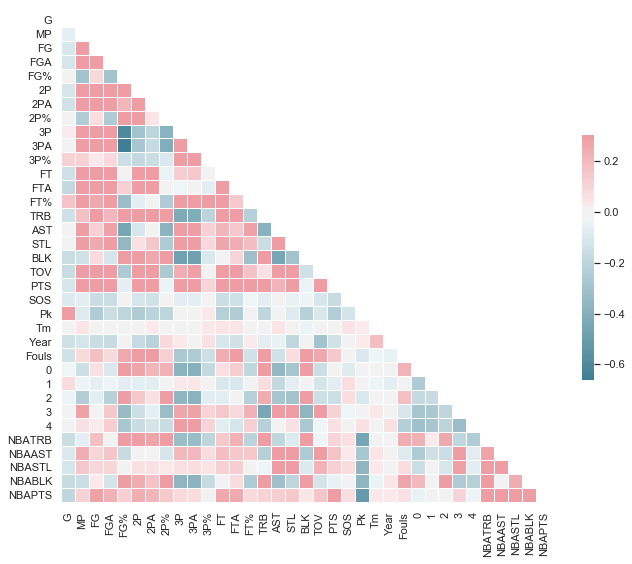

In [31]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="white")

d = df3

corr = d.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap=True)

print(sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.01, cbar_kws={"shrink": .5}))

## Feature Selection

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
model = LinearRegression()
rfe = RFE(model, 23)
reg = rfe.fit(train_x.values, train_y.NBAPTS.values)
print(reg.support_)
print(reg.ranking_)

[False  True  True  True  True  True  True  True  True  True False  True
  True False  True  True  True False  True  True  True  True False  True
 False  True False  True  True  True]
[2 1 1 1 1 1 1 1 1 1 4 1 1 3 1 1 1 5 1 1 1 1 6 1 7 1 8 1 1 1]


In [28]:
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True).fit(train_x.values, train_y.NBAPTS.values)
reg.feature_importances_

array([0.03231637, 0.0351566 , 0.03231304, 0.02944225, 0.02617857,
       0.02689389, 0.03391252, 0.02562442, 0.02318811, 0.02595399,
       0.02636979, 0.03215511, 0.03175946, 0.03531785, 0.02513292,
       0.03654495, 0.03238149, 0.43180139, 0.03541618, 0.02214112])

In [18]:
cols = []
co = df1.columns
for col in co:
    cols = cols + [col]
picks = []
for x in range(0,26):
    if reg.support_[x]:
        picks.append(cols[x])
train_x=train_x[picks]
test_x=test_x[picks]
train_x.head()

,MP,FG,FGA,FG%,2P,2PA,2P%,3P,3PA,FT,FTA,TRB,AST,STL,TOV,PTS,SOS,Pk,Year,0
Name,,,,,,,,,,,,,,,,,,,,
Kenyon Martin,-1.083978,-0.264125,-0.893807,1.872415,0.530167,0.142342,1.356737,-1.341998,-1.384652,-0.655172,-0.226338,0.919303,-0.749939,-0.037014,-0.724209,-0.661615,-0.067594,-1.547307,-1.747199,1.922575
Stromile Swift,-0.458212,0.280571,-0.356166,1.418773,0.917320,0.528005,1.263167,-1.080245,-1.081223,0.124313,0.719509,0.686578,-1.073778,0.360733,0.557136,-0.015706,-0.306428,-1.485160,-1.747199,1.922575
Marcus Fizer,0.901210,1.836844,1.400128,0.563833,2.465931,2.584872,0.121612,-1.080245,-1.081223,1.250236,1.530236,0.872758,-0.879475,-0.434762,0.272392,1.464502,-0.179639,-1.360865,-1.747199,1.922575
Mike Miller,-0.436634,-0.186311,-0.284481,0.075295,-0.321569,-0.586131,0.888887,0.228517,0.334776,0.124313,0.246585,0.221126,-0.037492,0.161859,0.130021,-0.042619,0.056246,-1.298718,-1.747199,-0.520136
DerMarr Johnson,-0.264009,-0.264125,-0.284481,-0.011944,-0.708722,-1.014645,1.076027,0.752023,0.789919,-0.655172,-0.699262,-0.802867,-0.620403,-0.235888,-1.008952,-0.231009,0.477891,-1.236571,-1.747199,-0.520136


## Linear Regression

In [32]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(train_x.values, train_y.NBAPTS.values)
#reg.score(train_x.values, train_y.NBAPTS.values)

reg.coef_

array([-1.61567269e-02, -2.73919150e-01, -6.64877137e-01, -1.59129090e+00,
        5.42007144e-02,  5.00728116e-01,  1.44270120e+00,  1.10876827e-01,
        5.01029742e-01,  1.03052976e+00, -8.85623676e-03, -1.01426316e-01,
        9.05863144e-02,  1.08576826e-02,  1.42060936e-01,  2.18175513e-01,
        6.14472641e-02,  6.23839214e-03, -4.70540736e-02,  3.28898251e-01,
        3.61890681e-02, -4.13345426e-01,  5.80832641e-03,  7.74431083e-02,
        1.97418147e-03, -6.78489738e-02, -4.46388392e-04, -3.80057817e-02,
        6.36728529e-02,  2.81237845e-02])

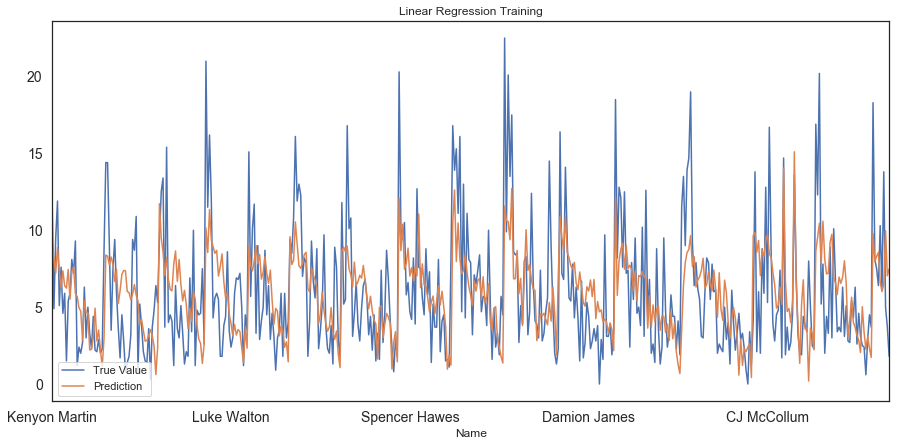

adj train r^2 = 0.3273843370859971
train mse = 10.491811382363613


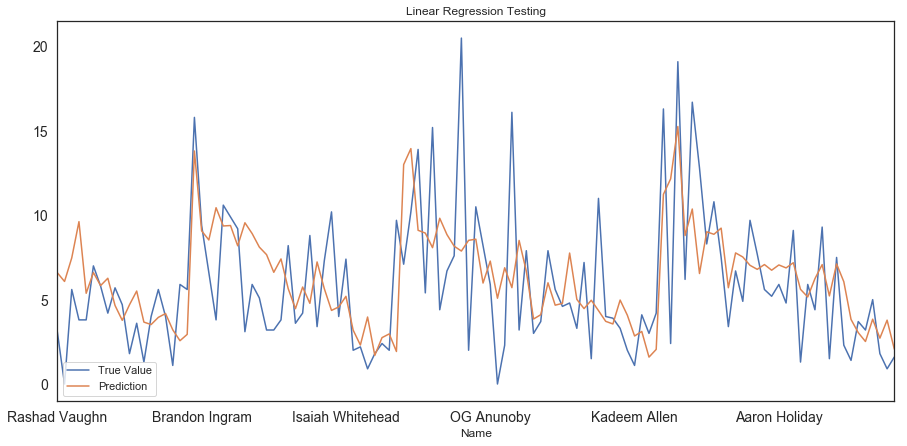

['G', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Pk', 'Tm', 'Year', 'Fouls', 0, 1, 2, 3, 4]
adj test r^2 = 0.1890502279954035
test mse = 12.43432502199849


In [33]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Linear Regression Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

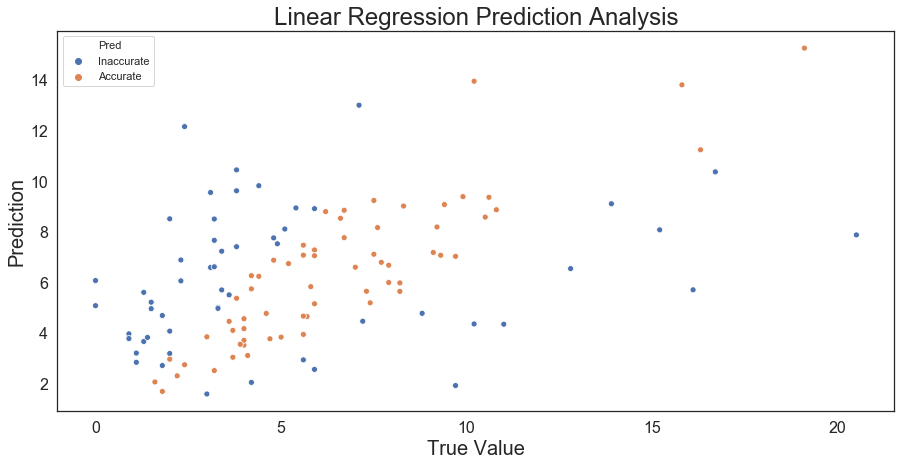

This model is able to relatively accurately predict 53.85% of NBA Rookies.


In [34]:
import seaborn as sns
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Linear Regression Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Extra Trees

In [35]:
from sklearn.ensemble import ExtraTreesRegressor
reg = ExtraTreesRegressor(min_samples_split=4, n_estimators=1000,bootstrap=True)
reg.fit(train_x.values, train_y.NBAPTS.values)

ExtraTreesRegressor(bootstrap=True, criterion='mse', max_depth=None,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=4,
          min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

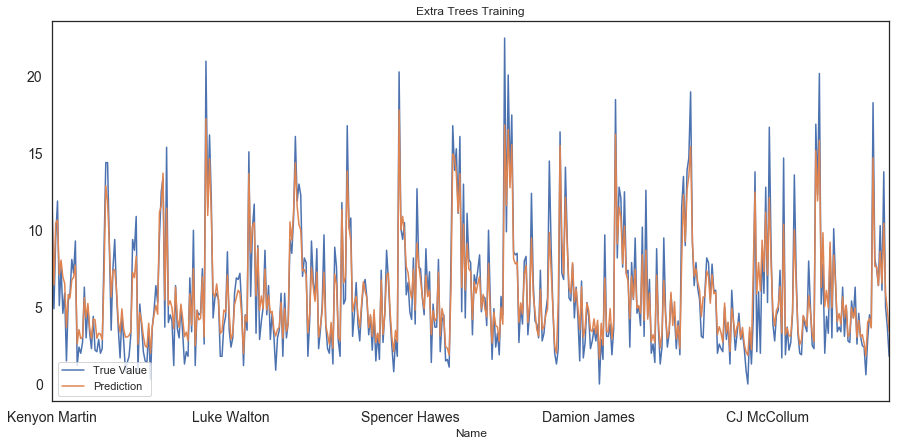

adj train r^2 = 0.8829791636867926
train mse = 1.825352292697939


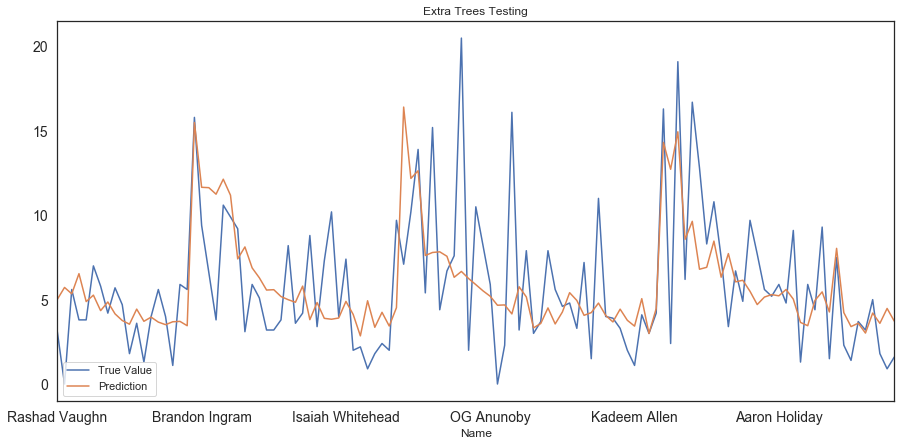

['G', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Pk', 'Tm', 'Year', 'Fouls', 0, 1, 2, 3, 4]
adj test r^2 = 0.21727312686225242
test mse = 12.001582194158589


In [36]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Extra Trees Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

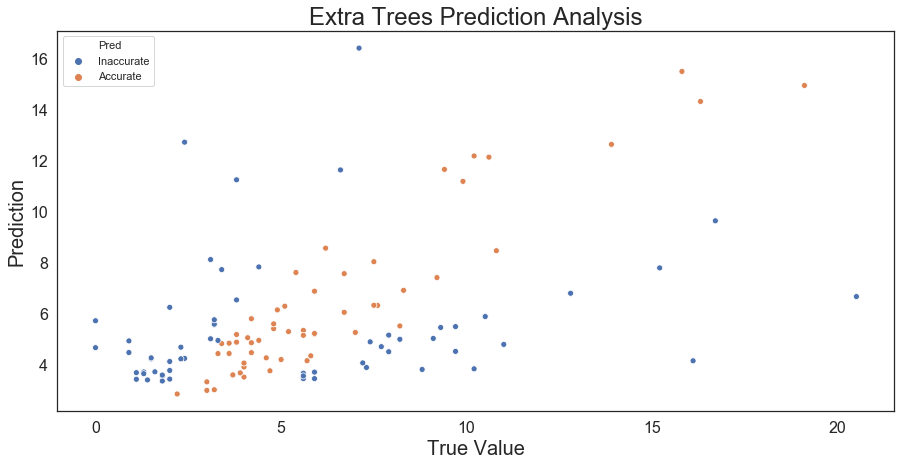

This model is able to relatively accurately predict 48.72% of NBA Rookies.


In [37]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Extra Trees Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Random Forrest

In [24]:
from sklearn.ensemble import RandomForestRegressor
reg = RandomForestRegressor(n_estimators=1000)
reg.fit(train_x.values, train_y.NBAPTS.values)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

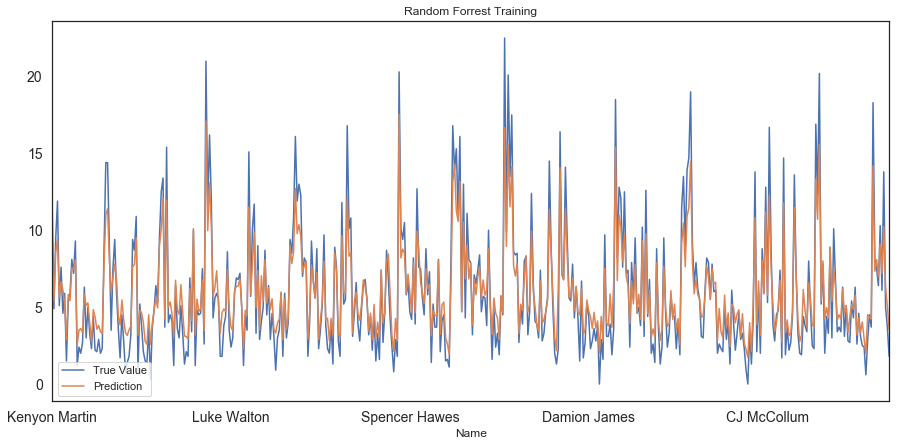

adj train r^2 = 0.8600240100416965
train mse = 2.193388750533053


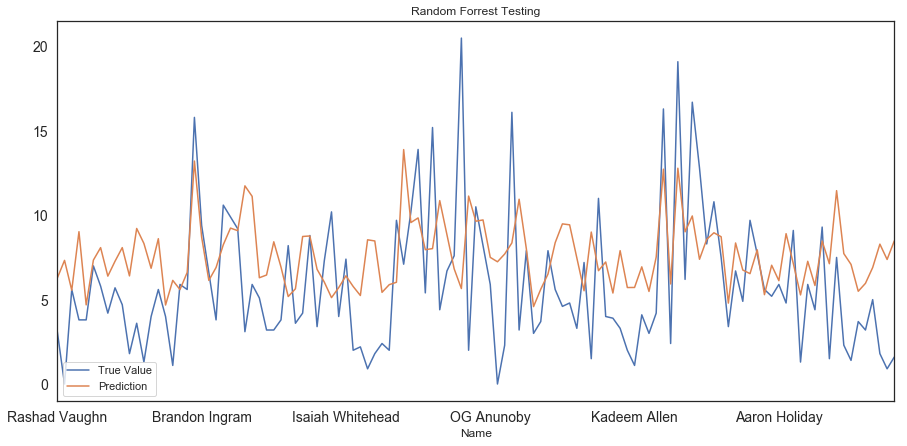

['G', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Year', 'Fouls', 0, 1, 2, 3, 4]
adj test r^2 = -0.15300122904605407
test mse = 17.759739670341897


In [25]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'Random Forrest Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

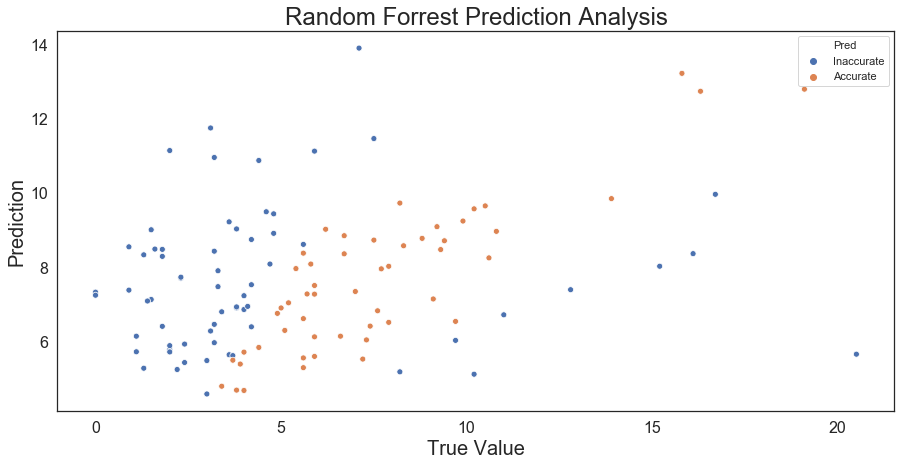

This model is able to relatively accurately predict 44.44% of NBA Rookies.


In [26]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("Random Forrest Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## XGBoost

In [38]:
import os

os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [28]:
from xgboost import XGBRegressor

reg = XGBRegressor(n_estimators=1000, max_depth=4, reg_lambda=.48, gamma=.3, booster='gblinear')
reg.fit(train_x.values, train_y.NBAPTS.values)

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=1,
       colsample_bytree=1, gamma=0.3, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=0.48, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

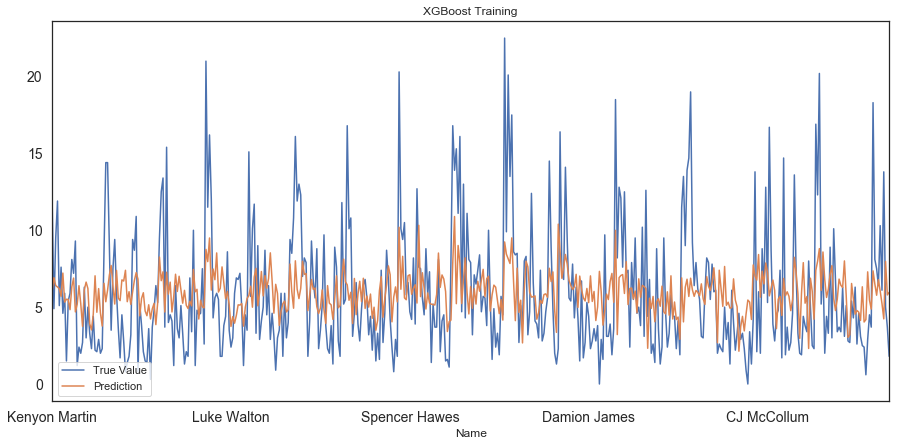

adj train r^2 = 0.13299510979284346
train mse = 13.585749766113466


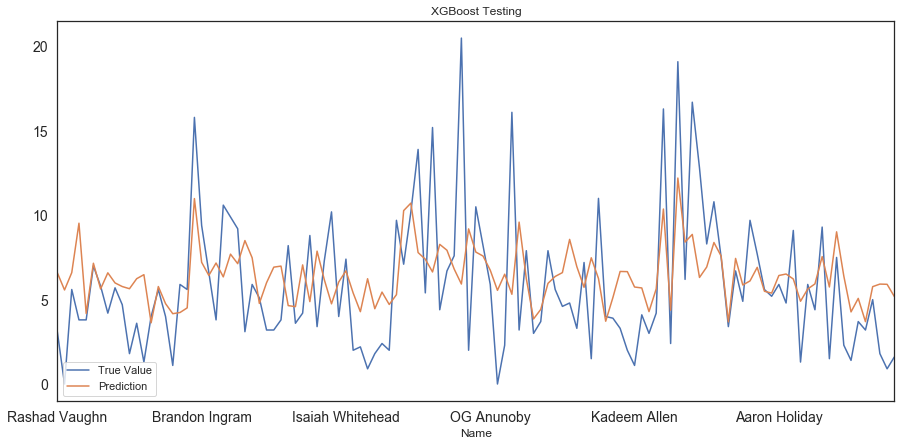

['G', 'MP', 'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT', 'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PTS', 'SOS', 'Year', 'Fouls', 0, 1, 2, 3, 4]
adj test r^2 = 0.11696571568097858
test mse = 13.60142436488772


In [29]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(reg.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(reg.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'XGBoost Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print(list(train_x.columns.values))
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

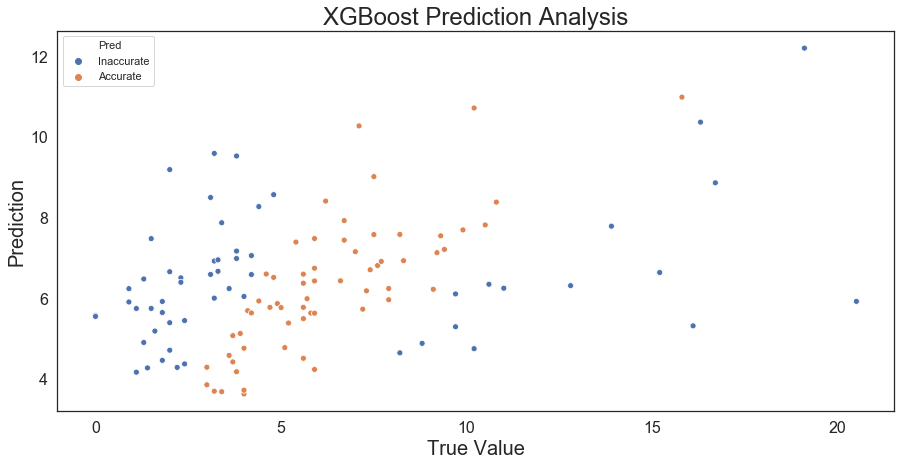

This model is able to relatively accurately predict 52.14% of NBA Rookies.


In [30]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("XGBoost Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Feed Forward Neural Network

In [44]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
import keras.backend as K
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.models import load_model
from keras.layers import LSTM
from keras import regularizers

Using TensorFlow backend.


In [33]:
K.clear_session()
model = Sequential()
model.add(Dense(128, input_dim=28, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
#model.add(Dropout(0.2))
model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='Adam', loss='mean_squared_error')
early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
out = model.fit(train_x.values, train_y.NBAPTS.values, validation_data=[test_x.values, test_y['NBAPTS'].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])

Instructions for updating:
Use tf.cast instead.


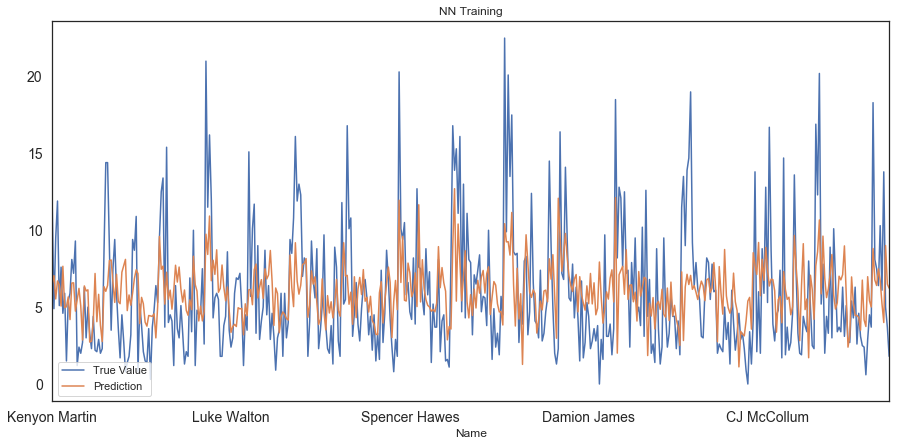

adj train r^2 = 0.17862435331379678
train mse = 12.870750933356469


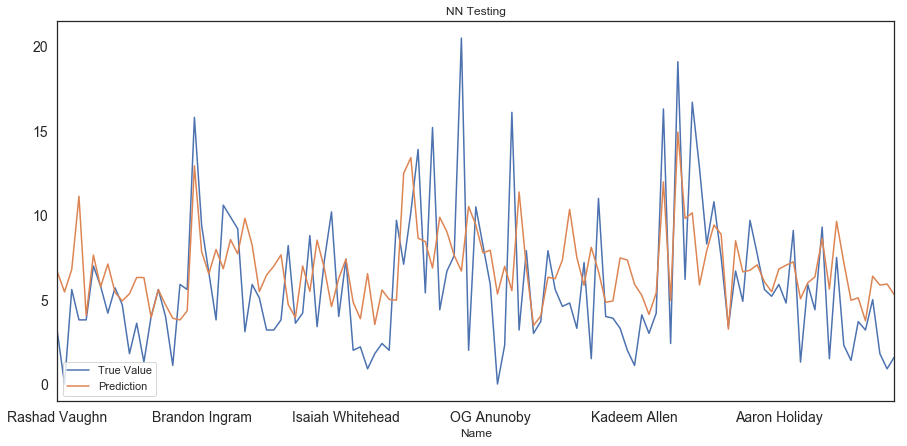

adj test r^2 = 0.07130508381697553
test mse = 14.304737522462526


In [34]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(model.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'NN Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'NN Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

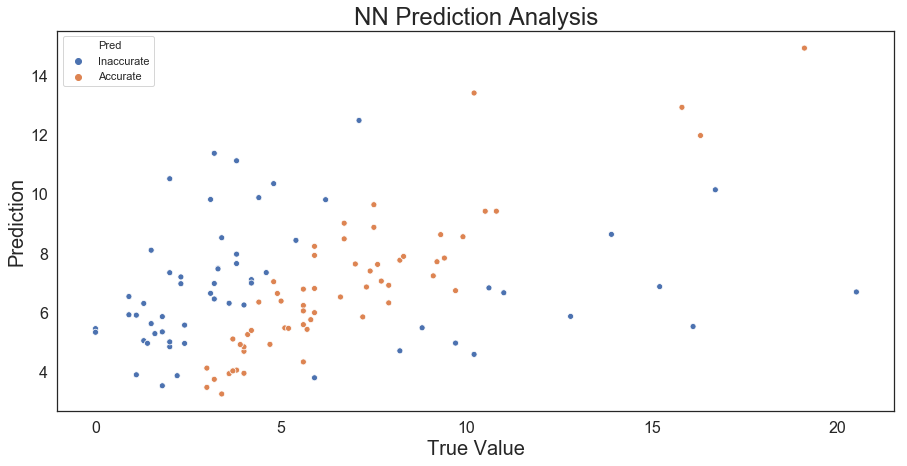

This model is able to relatively accurately predict 50.43% of NBA Rookies.


In [35]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## LSTM

In [36]:
X_tr_t = train_x.values.reshape(train_x.shape[0], 1, train_x.shape[1])
X_tst_t = test_x.values.reshape(test_x.shape[0], 1, test_x.shape[1])

In [52]:
K.clear_session()
model_lstm = Sequential()
model_lstm.add(LSTM(600, input_shape=(1, train_x.values.shape[1]), activation='linear',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
model_lstm.add(LSTM(600, activation='relu'))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='tanh',kernel_initializer='lecun_uniform',return_sequences=True))
#model_lstm.add(Dropout(0.4))
#model_lstm.add(LSTM(600, activation='relu'))
model_lstm.add(Dense(1))
model_lstm.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=10, verbose=1, restore_best_weights=True)
history_model_lstm = model_lstm.fit(X_tr_t, train_y.NBAPTS.values.ravel(), validation_data=[X_tst_t, test_y['NBAPTS'].values.ravel()], epochs=40, verbose=0, shuffle=False, callbacks=[early_stop])

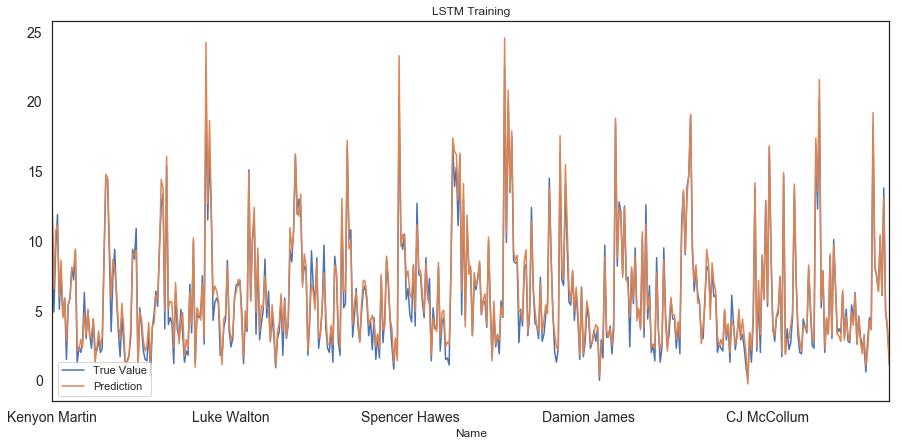

adj train r^2 = 0.9606968036037705
train mse = 0.6200703788474766


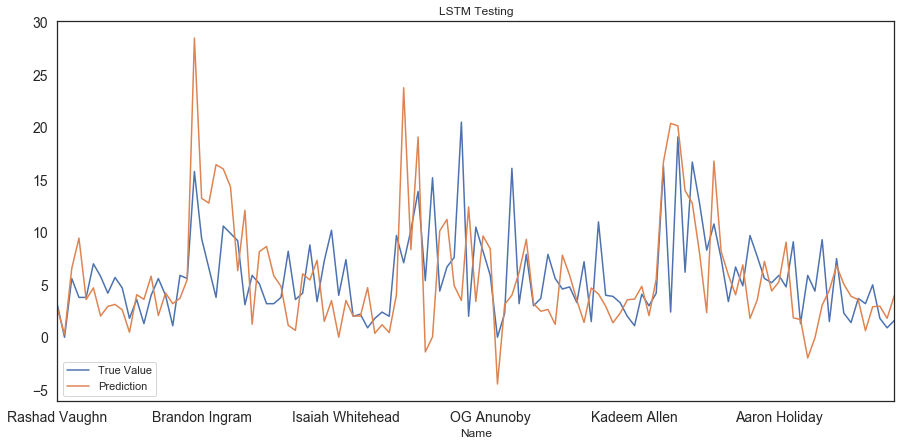

adj test r^2 = -0.7692694515013054
test mse = 27.437962227868777


In [53]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tr_t))
test_y2['prediction'] = sc2.inverse_transform(model_lstm.predict(X_tst_t))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'LSTM Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

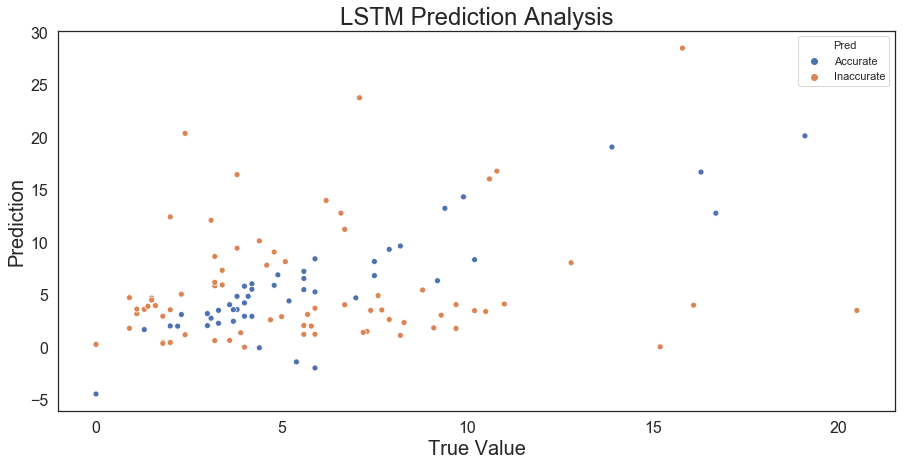

This model is able to relatively accurately predict 39.32% of NBA Rookies.


In [54]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("LSTM Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## TPOT

In [55]:
from tpot import TPOTRegressor
from sklearn.metrics.scorer import make_scorer

#my_custom_scorer = make_scorer(my_custom_accuracy, greater_is_better=True)

tpot = TPOTRegressor(population_size=10, max_time_mins=2, verbosity=1, config_dict='TPOT light')
tpot.fit(train_x.values, train_y.NBAPTS.values.ravel())


2.0040822666666664 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.
Best pipeline: DecisionTreeRegressor(LinearSVR(CombineDFs(input_matrix, MinMaxScaler(input_matrix)), C=20.0, dual=True, epsilon=0.1, loss=squared_epsilon_insensitive, tol=0.0001), max_depth=4, min_samples_leaf=20, min_samples_split=6)


TPOTRegressor(config_dict='TPOT light', crossover_rate=0.1, cv=5,
       disable_update_check=False, early_stop=None, generations=1000000,
       max_eval_time_mins=5, max_time_mins=2, memory=None,
       mutation_rate=0.9, n_jobs=1, offspring_size=None,
       periodic_checkpoint_folder=None, population_size=10,
       random_state=None, scoring=None, subsample=1.0,
       template='RandomTree', use_dask=False, verbosity=1,
       warm_start=False)

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


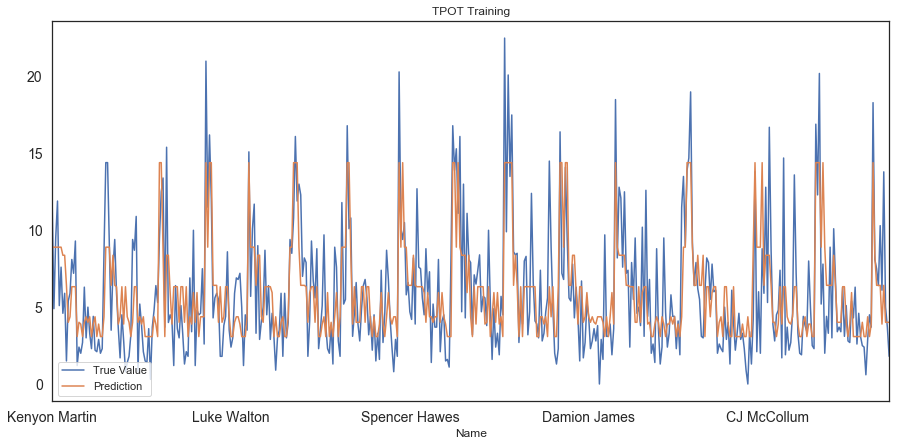

adj train r^2 = 0.5221982537576978
train mse = 7.538081809419249


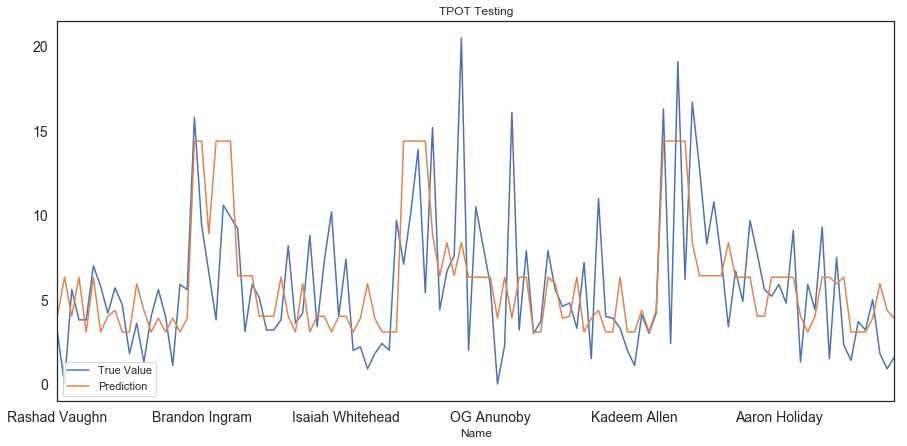

adj test r^2 = 0.045083886632132475
test mse = 14.808910099667468


In [56]:
train_y2 = train_y.copy(deep=True)
test_y2 = test_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(tpot.predict(train_x.values))
test_y2['prediction'] = sc2.inverse_transform(tpot.predict(test_x.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
test_y2['NBAPTS'] = sc2.inverse_transform(test_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))
test_y2['NBAPTS'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='True Value')
test_y2['prediction'].plot(figsize=(15,7), title= 'TPOT Testing', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj test r^2 = ' + str(adj_r2_score((r2_score(test_y2.NBAPTS, test_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('test mse = ' + str(mean_squared_error(test_y2.NBAPTS, test_y2.prediction)))

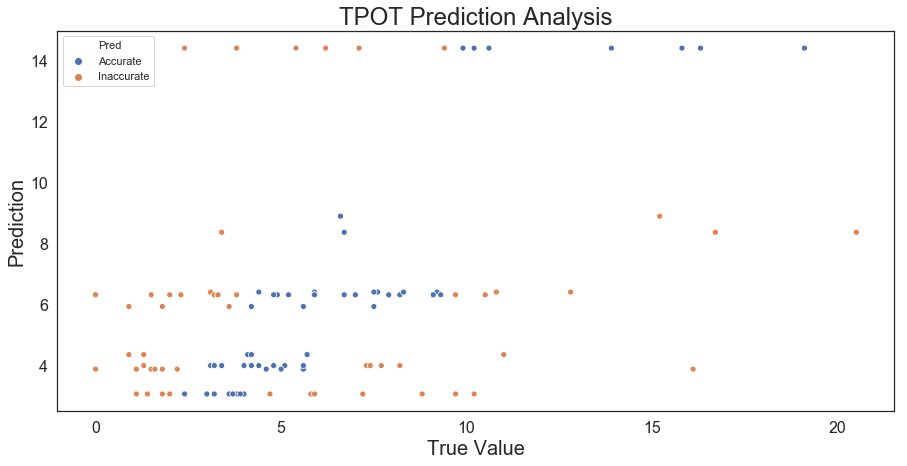

This model is able to relatively accurately predict 51.28% of NBA Rookies.


In [57]:
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
test_y2.loc[test_y2[['prediction','NBAPTS']].max(axis=1)/test_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=test_y2)
ax.set_title("TPOT Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model is able to relatively accurately predict " + str(round(100*len(test_y2[test_y2['Pred'] == 'Accurate'])/len(test_y2),2)) + "% of NBA Rookies.")

## Differences

In [58]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=True).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Jaren Jackson,-0.812747,-0.522722,0.022550,-0.841458,2.4,14.397222,Inaccurate,-11.997222
Kris Dunn,-0.176597,0.818430,1.299060,0.721179,3.8,14.397222,Inaccurate,-10.597222
Jonathan Isaac,0.671603,-0.381548,1.809663,2.596343,5.4,14.397222,Inaccurate,-8.997222
Mohamed Bamba,1.360766,-0.310961,-0.488053,3.533925,6.2,14.397222,Inaccurate,-8.197222
Markelle Fultz,0.353528,1.806648,1.043758,0.096124,7.1,14.397222,Inaccurate,-7.297222


In [59]:
test_y2['chip'] = test_y2['NBAPTS'] - test_y2['prediction']
test_y2.sort_values('chip', ascending=False).head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,prediction,Pred,chip
Name,,,,,,,,
Kyle Kuzma,2.049929,0.394909,0.277852,0.408652,16.1,3.897561,Inaccurate,12.202439
Donovan Mitchell,0.671603,1.736061,2.575569,0.096124,20.5,8.374074,Inaccurate,12.125926
Collin Sexton,0.247503,1.241952,0.022550,-0.528930,16.7,8.374074,Inaccurate,8.325926
Malcolm Brogdon,0.194491,2.088996,1.554361,-0.216403,10.2,3.084884,Inaccurate,7.115116
Dillon Brooks,0.353528,0.253735,1.043758,-0.216403,11.0,4.373016,Inaccurate,6.626984


## 2019 Predictions

In [41]:
train=df3
test=df4
trains = np.split(train, [30], axis=1)
train_x=trains[0]
train_y=trains[1]
tests = np.split(test, [30], axis=1)
test_x=tests[0]
test_y=tests[1]

In [42]:
test_y.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS
Name,,,,,
Zion Williamson,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218
RJ Barrett,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218
DeAndre Hunter,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218
Darius Garland,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218
Jarrett Culver,-1.284475,-0.873227,-1.248902,-0.8392,-1.290218


In [45]:
from sklearn.feature_selection import RFE
cols_at_end = ['NBATRB','NBAAST','NBASTL','NBABLK','NBAPTS']
scalars = [sc2, sc3, sc4, sc5, sc6]
test_y2 = test_y.copy(deep=True)
for x in range(5):
    col = cols_at_end[x]
    scalar = scalars[4-x]
    model = LinearRegression()
    rfe = RFE(model, 23)
    reg = rfe.fit(train_x.values, train_y[col].values)
    cols = []
    co = df3.columns
    for colo in co:
        cols = cols + [colo]
    picks = []
    for x in range(0,30):
        if reg.support_[x]:
            picks.append(cols[x])
    train_x3 = train_x[picks]
    test_x3 = test_x[picks]
    K.clear_session()
    model = Sequential()
    model.add(Dense(128, input_dim=23, activation='tanh',kernel_regularizer=regularizers.l2(0.23)))
    model.add(Dense(64, activation='tanh',kernel_regularizer=regularizers.l2(0.13)))
    model.add(Dense(8, activation='tanh',kernel_regularizer=regularizers.l2(0.03)))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer='Adam', loss='mean_squared_error')
    early_stop = EarlyStopping(monitor='loss', patience=50, verbose=0, min_delta=.000001,restore_best_weights=True)
    out = model.fit(train_x3.values, train_y[col].values.ravel(), validation_data=[test_x3.values, test_y[col].values.ravel()], epochs=500, verbose=0, shuffle=False, callbacks=[early_stop])
    test_y2[col] = scalar.inverse_transform(model.predict(test_x3.values))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


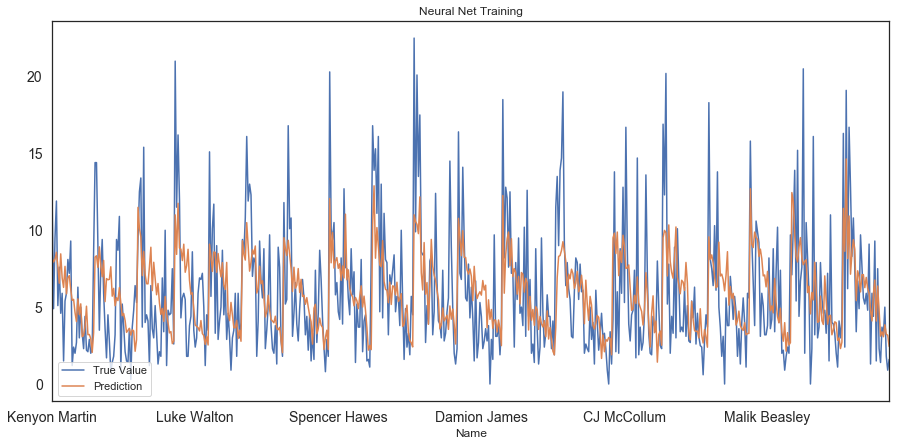

adj train r^2 = 0.3362981161781474
train mse = 10.459961092451117


In [46]:
train_y2 = train_y.copy(deep=True)
train_y2['prediction'] = sc2.inverse_transform(model.predict(train_x3.values))
train_y2['NBAPTS'] = sc2.inverse_transform(train_y2['NBAPTS'])
train_y2['NBAPTS'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='True Value')
train_y2['prediction'].plot(figsize=(15,7), title= 'Neural Net Training', fontsize=14, label='Prediction')
plt.legend(loc='lower left')
plt.show()
print('adj train r^2 = ' + str(adj_r2_score((r2_score(train_y2.NBAPTS, train_y2.prediction)),train_x.shape[0], train_x.shape[1])))
print('train mse = ' + str(mean_squared_error(train_y2.NBAPTS, train_y2.prediction)))

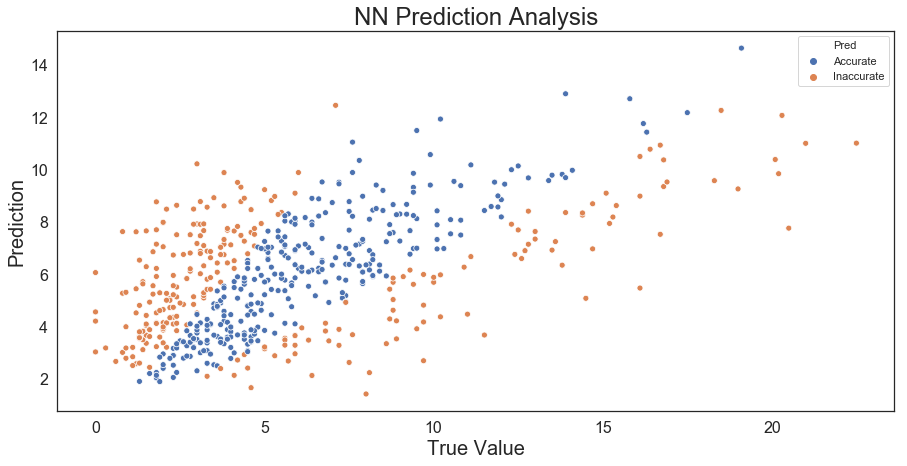

This model should be able to relatively accurately predict about 54.27% of NBA Rookies.


In [47]:
import seaborn as sns
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) >= 1.5, 'Pred'] = 'Inaccurate'
train_y2.loc[train_y2[['prediction','NBAPTS']].max(axis=1)/train_y2[['prediction','NBAPTS']].min(axis=1) < 1.5, 'Pred'] = 'Accurate'
fig, ax1 = plt.subplots(figsize=(15, 7))
ax = sns.scatterplot(x="NBAPTS", y="prediction", hue="Pred", data=train_y2)
ax.set_title("NN Prediction Analysis", fontsize=24)
ax.set_xlabel("True Value",fontsize=20)
ax.set_ylabel("Prediction",fontsize=20)
ax.tick_params(labelsize=16)
plt.show()
print ("This model should be able to relatively accurately predict about " + str(round(100*len(train_y2[train_y2['Pred'] == 'Accurate'])/len(train_y2),2)) + "% of NBA Rookies.")

In [48]:
test_y2 = test_y2.loc[~test_y2.index.duplicated(keep='first')]

## Results

In [49]:
test_y2['Value'] = 1*test_y2['NBAPTS'] + 1.2*test_y2['NBATRB'] + 1.5*test_y2['NBAAST'] + 3*test_y2['NBASTL'] + 3*test_y2['NBABLK']
test_y2.sort_values('Value', ascending=False)

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Zion Williamson,6.554159,2.502774,1.245143,0.699090,14.189835,31.641682
Ja Morant,3.986797,5.056324,0.941879,0.323344,11.630063,27.794373
RJ Barrett,3.774522,2.366123,0.669234,0.250694,12.237726,23.076120
Brandon Clarke,5.307744,1.546423,0.721383,0.920425,9.111282,22.725634
Jaxson Hayes,5.214276,1.126444,0.703015,0.893389,8.904975,21.640982
Coby White,2.647978,3.113752,0.766626,0.243182,10.491193,21.368818
Darius Garland,2.881467,2.899190,0.697483,0.259437,10.562834,21.240137
Jarrett Culver,3.246037,1.971224,0.789323,0.332879,9.588758,19.807447
Rui Hachimura,4.065410,1.431493,0.603316,0.364948,9.425023,19.355545


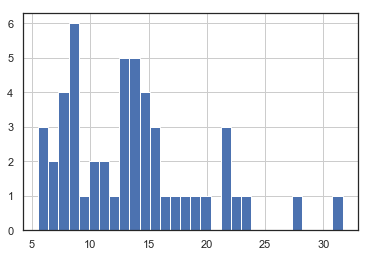

Value Distribution in Draft


In [50]:
hist = test_y2['Value'].hist(bins=30)
plt.show()
print('Value Distribution in Draft')
## This is the result of Neural Networks

In [51]:
test_y2['NBAPTS'].mean()

6.130726337432861

In [52]:
test_y2 = test_y2.round(2)
test_y2 = test_y2.sort_index(axis = 0) 
test_y2.head()

,NBATRB,NBAAST,NBASTL,NBABLK,NBAPTS,Value
Name,,,,,,
Admiral Schofield,1.92,0.39,0.35,0.17,4.19,8.63
Bol Bol,3.32,0.27,0.24,0.70,5.85,13.06
Brandon Clarke,5.31,1.55,0.72,0.92,9.11,22.73
Bruno Fernando,3.92,0.59,0.34,0.63,5.25,13.74
Cam Reddish,1.87,1.06,0.66,0.30,7.04,13.75


In [61]:
finaly.to_csv('NewRookiePredictions4.csv')

## Draft Night vs Results

In [66]:
college2 = pd.read_csv('2019DraftResults.csv')
dfo = pd.read_csv('NewRookiePredictions4.csv')

In [67]:
college2 = college2.drop(['Unnamed: 0'], axis=1)
dfo = dfo.drop(['Unnamed: 0'], axis=1)
dfo = dfo.sort_values('Value', ascending=False)
dfo = dfo.reset_index()
dfo = dfo.drop(['index'], axis=1)
college2 = college2.rename(index=str, columns={"emp": "Name"})

In [74]:
from IPython.display import display_html 
df1_styler = college2[college2['pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Point Guards:')
df2_styler = dfo[dfo['Pos']=='PG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Point Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
1,Ja Morant,6-3,175,PG,Murray St.,19
4,Darius Garland,6-2,175,PG,Vanderbilt,19
6,Coby White,6-5,190,PG,North Carolina,19
23,Ty Jerome,6-5,195,PG,Virginia,21
27,Jordan Poole,6-5,190,PG,Michigan,20
32,Carsen Edwards,6-0,200,PG,Purdue,21
42,Jaylen Nowell,6-4,200,PG,Washington,19
50,Tremont Waters,5-11,175,PG,LSU,21
52,Justin Wright-Foreman,6-2,190,PG,Hofstra,21
54,Kyle Guy,6-2,170,PG,Virginia,21


In [75]:
df1_styler = college2[college2['pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Shooting Guards:')
df2_styler = dfo[dfo['Pos']=='SG'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Shooting Guards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
2,RJ Barrett,6-7,210,SG,Duke,19
5,Jarrett Culver,6-6,195,SG,Texas Tech,20
9,Cameron Reddish,6-8,210,SG,Duke,19
12,Tyler Herro,6-6,195,SG,Kentucky,19
13,Romeo Langford,6-6,210,SG,Indiana,19
16,Nickeil Alexander-Walker,6-5,205,SG,Virginia Tech,20
19,Matisse Thybulle,6-6,200,SG,Washington,22
25,Dylan Windler,6-7,195,SG,Belmont,22
28,Keldon Johnson,6-6,215,SG,Kentucky,19
29,Kevin Porter,6-5,215,SG,USC,19


In [76]:
df1_styler = college2[college2['pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Small Forwards:')
df2_styler = dfo[dfo['Pos']=='SF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Small Forwards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
3,DeAndre Hunter,6-7,225,SF,Virginia,21
8,Rui Hachimura,6-8,235,SF,Gonzaga,21
10,Cameron Johnson,6-8,205,SF,North Carolina,23
14,Sekou Doumbouya,6-9,230,SF,France,18
15,Chuma Okeke,6-8,235,SF,Auburn,20
22,Darius Bazley,6-9,210,SF,USA,19
24,Nassir Little,6-6,225,SF,North Carolina,19
36,Deividas Sirvydis,6-8,195,SF,Lithuania,19
41,Admiral Schofield,6-5,240,SF,Tennessee,22
44,Isaiah Roby,6-8,215,SF,Nebraska,21


In [77]:
df1_styler = college2[college2['pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Power Forwards:')
df2_styler = dfo[dfo['Pos']=='PF'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Power Forwards:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Name,height,weight,pos,col,age
0,Zion Williamson,6-6,280,PF,Duke,18
7,Jaxson Hayes,6-11,220,PF,Texas,19
11,PJ Washington,6-8,230,PF,Kentucky,20
18,Luka Samanic,6-11,230,PF,Croatia,19
20,Brandon Clarke,6-8,210,PF,Gonzaga,22
21,Grant Williams,6-7,240,PF,Tennessee,20
26,Mfiondu Kabengele,6-10,255,PF,Florida St.,21
30,Nicolas Claxton,6-11,215,PF,Georgia,20
37,Daniel Gafford,6-10,240,PF,Arkansas,20
38,Alen Smailagic,6-10,215,PF,Serbia,18


In [73]:
df1_styler = college2[college2['pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Draft Results Centers:')
df2_styler = dfo[dfo['Pos']=='C'].style.\
                set_table_attributes("style='display:inline'").\
                set_caption('Power Ranking Centers:')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

Draft Results Centers: Name height weight pos col age 
 
 17 
 Goga Bitadze 
 6-11 
 250 
 C 
 Rep. of Georgia 
 19 
 
 
 33 
 Bruno Fernando 
 6-10 
 240 
 C 
 Maryland 
 20 
 
 
 43 
 Bol Bol 
 7-2 
 210 
 C 
 Oregon 
 19 
 
 
 58 
 Dewan Hernandez 
 6-10 
 235 
 C 
 Miami 
 22 
 
 Power Ranking Centers: Name NBATRB NBAAST NBASTL NBABLK NBAPTS Value Pos 
 
 22 
 Bruno Fernando 
 3.92 
 0.59 
 0.34 
 0.63 
 5.25 
 13.74 
 C 
 
 
 25 
 Bol Bol 
 3.32 
 0.27 
 0.24 
 0.7 
 5.85 
 13.06 
 C